## **SHRUTI GUPTA**

**DATA SCIENCE AND BUSINESS ANALYST INTERN**

**GRIPS - THE SPARKS FOUNDATION**

### **TASK 2 - Prediction using Unsupervised ML**

From the given Iris dataset, predict the optimum number of clusters and represent it visually.

### **Importing the dataset into the notebook environment**

The iris dataset was downloaded from the link as provided in the tasklist and then from the local computer, uploaded into the labs environment. After this, the pandas library of python was used to create a datframe called iris and the data was loaded into it and suitably displayed.

In [1]:
import pandas as pd
iris=pd.read_csv(r'C:\Users\Shruti Gupta\OneDrive\Desktop\GRIPS\Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


We use the shape function to see how many samples of data we have.

In [2]:
iris.shape

(150, 6)

### **Clustering the data**

To cluster the dataset, the use of K means clustering algorithm is done. This is because K means is the most intiutive and easy to use clustering model. The main problem with this algorithm lies in the optimum K value selection. For this purpose, different K values can be used and the mean error can be calculated for each of these. Following this, a graph can be plotted between these K values and the errors corresponding to the. The elbow point of this graph will be the optimum K value.

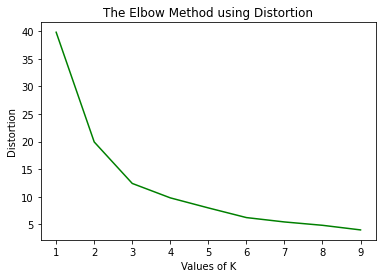

In [3]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
x_train=iris['Id']+iris['SepalLengthCm']+iris['SepalWidthCm']+iris['PetalLengthCm']+iris['PetalWidthCm']
X = np.array(list(x_train)).reshape(-1,1) 
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
plt.plot(K, distortions,color='Green') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

As can be seen from the above plot, the elbow value for the distortion plot is 3 which means that the optimum value for clusters or K in case of the iris dataset is 3.

### **Applying the K means Clustering algorithm to the datset**

We now apply the K means clustering model to the training set and obtain a trained model.

In [4]:
Km=KMeans(init="k-means++",n_clusters=3,n_init=12)
x_train= np.array(list(x_train)).reshape(-1,1)
Km.fit(x_train)

KMeans(n_clusters=3, n_init=12)

In [5]:
# The labels assigned to the datapoints
Km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# cluster heads for each cluster
Km.cluster_centers_

array([[ 89.792],
       [ 35.632],
       [142.64 ]])

### **Visualizing the clusters**

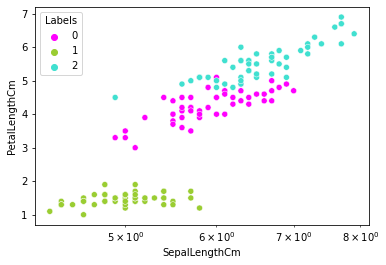

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
iris['Labels']=Km.labels_
g =sns.scatterplot(x="SepalLengthCm", y="PetalLengthCm",
              hue="Labels",palette=['Magenta','YellowGreen','Turquoise'], legend='full',
              data=iris);
g.set(xscale="log");